<a href="https://colab.research.google.com/github/Letch49/ML_VVSU_2023/blob/main/lab5/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_5_(%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets seaborn

In [ ]:
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
dataset = load_dataset('lvwerra/red-wine')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
data = dataset['train']

df = pd.DataFrame(data)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# Пример разделения на обучающую и тестовую выборку
X = df
y = df.alcohol # целевая переменная
X = X.drop('alcohol', axis=1) # признаки для исследования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test # 1279 строк на оубчение и 320 строк на валидацию

(493     11.6
 354     11.9
 342      9.8
 834      9.4
 705      9.9
         ... 
 1130    10.4
 1294    10.9
 860      9.5
 1459    11.9
 1126    13.5
 Name: alcohol, Length: 1279, dtype: float64,
 803      9.6
 124      9.5
 350      9.9
 682      9.8
 1326    10.6
         ... 
 1259    11.3
 1295     9.5
 1155     9.8
 963     11.2
 704      9.7
 Name: alcohol, Length: 320, dtype: float64)

Бинниг (или превращение числовой переменную в категориальную).

Посмотрим на исходные данные (уникальные, это не все наблюдения)

In [ ]:
df.pH.unique() # для примера сделаем из df.pH категориальный признак

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

Сделаем биннинг

In [ ]:
# Выполнение биннинга (разбиения на интервалы)
bins = np.linspace(df.pH.min(), df.pH.max(), 5)  # Создаем 5 интероалов
ph_binned = np.digitize(df.pH, bins)

df['ph_bins'] = ph_binned
df['ph_bins'] = df['ph_bins'].astype('category')
df = df.drop('pH', axis=1)

А дальше интереснее. В текущем варианте результаты бининга можем считать как числовой переменной, так и категориальной. Масштаб в целом сохраняется, то есть, порядок существует (чем больше число -> тем больше pH).

P.S. но это не всегда верно

Задача исследования - прогнозирования содержания алкоголя alcohol в вине.

In [ ]:
df.info() # все признаки числовые, кроме ph_bins

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   sulphates             1599 non-null   float64 
 9   alcohol               1599 non-null   float64 
 10  quality               1599 non-null   int64   
 11  ph_bins               1599 non-null   category
dtypes: category(1), float64(10), int64(1)
memory usage: 139.3 KB


Проведем исследование переменных относительно распределния и выбросов, а также исследуем оносительно целевой переменной.

In [ ]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns # выбираем числвоые колонки
cat_columns  = df.select_dtypes(include=['category']).columns # выбираем категориальные колонки

# EDA

Что тут важно?
Посмотреть что нет перекоса в распределниях (в числовых и категориальных переменных). Если есть, то вероятно признак не имеет никакого значения для дальнейшего анализа.

В машинном обучении существует огромная тема по поводу подбора фичей [feature_selection](https://scikit-learn.org/stable/modules/feature_selection.html). С этим мы познакомимся позже, пока попробуем ручным способ посмотреть, что нам подходит.

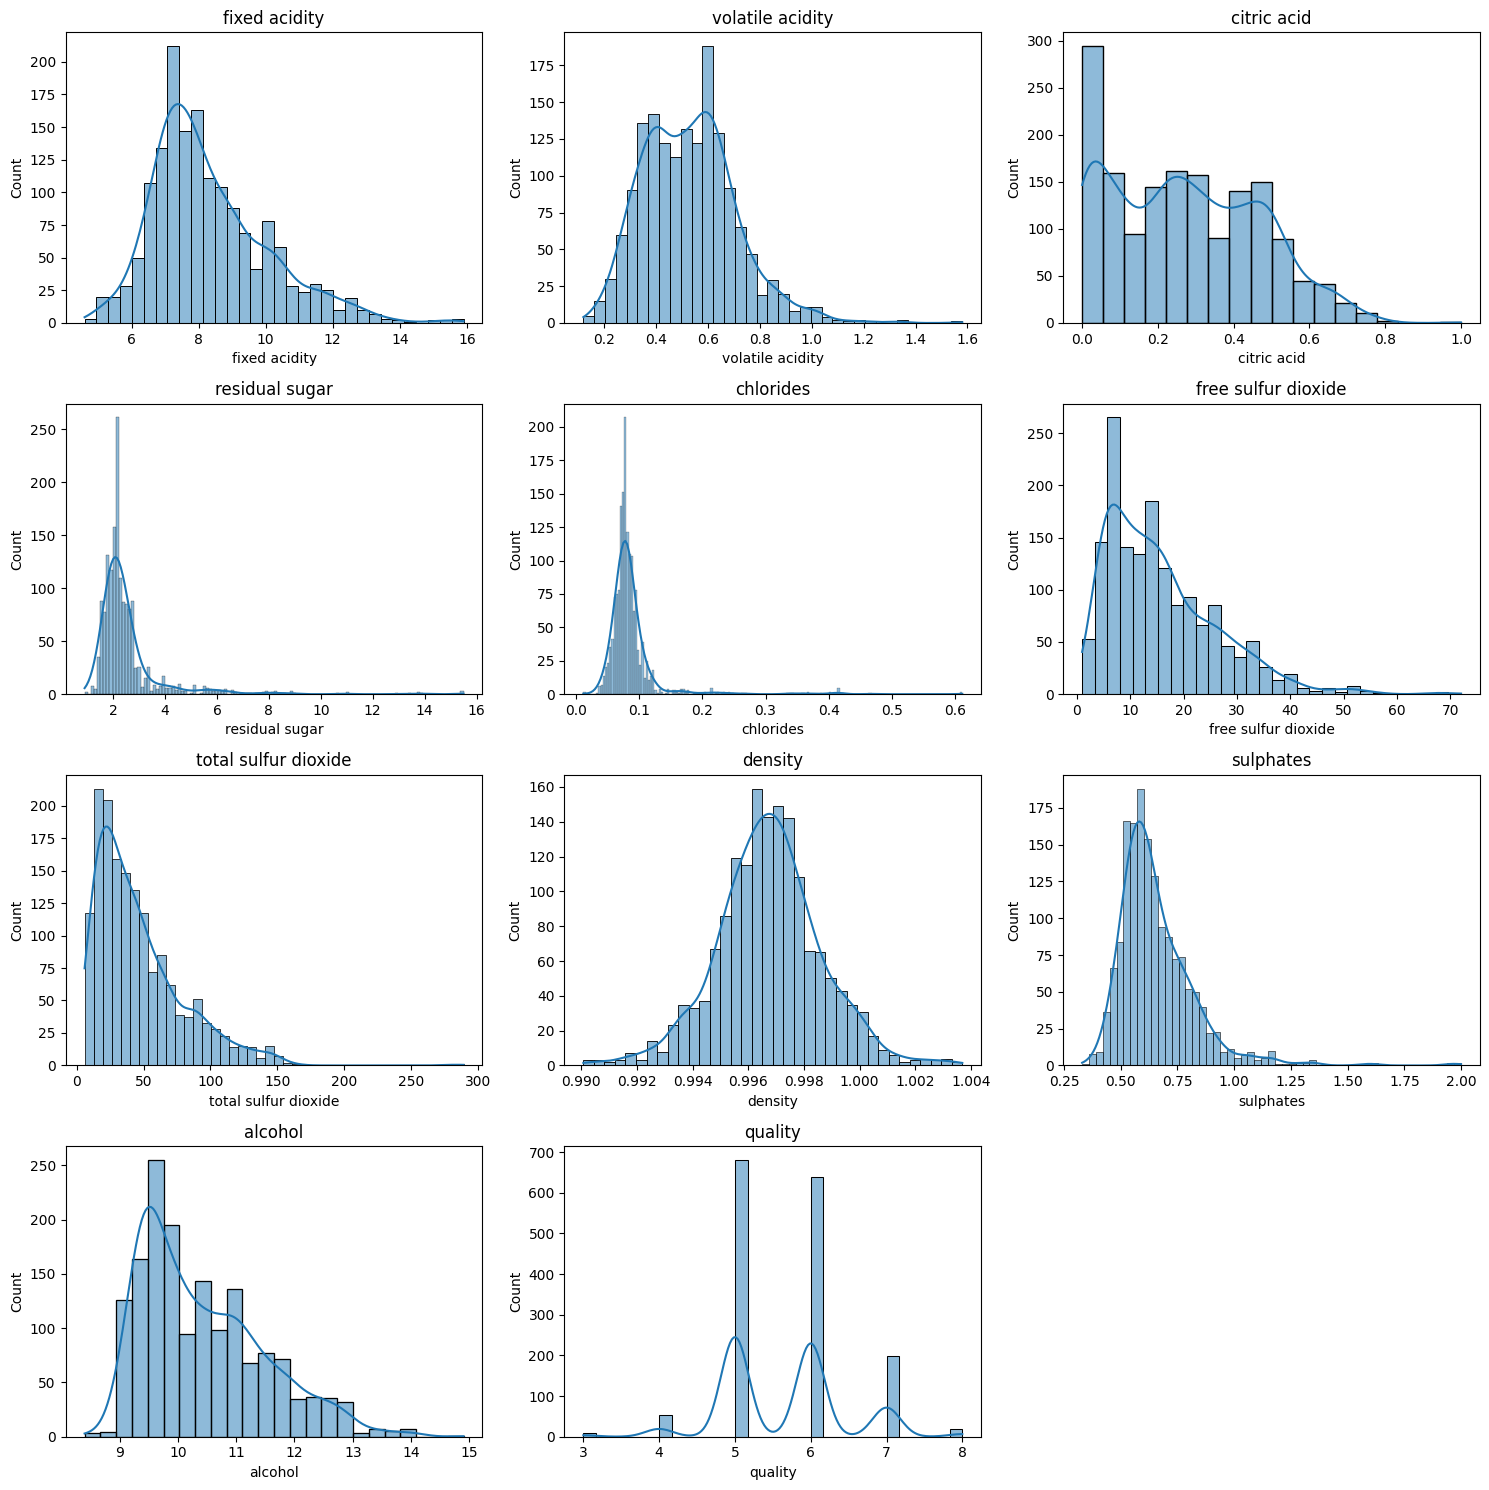

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


По распределениям можно предположить, что существует зависимость между fresidual sugar и chlorides, если очистить от выбросов, то распределение похоже на "нормальное", но нужно проверять.
Также quality похоже больше на категорию, чем на число, но тем не менее, это число.

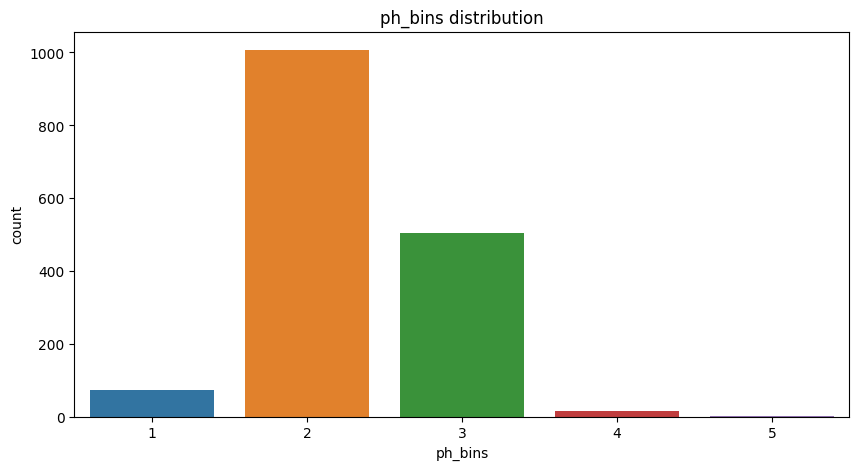

In [ ]:
# Countplot для ph_bins. посмотрим распределение отдельных признаков и видим, что 2 и 3 группы представляют собой большинство наблюдений
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='ph_bins')
plt.title('ph_bins distribution')
plt.show()

<Axes: xlabel='ph_bins', ylabel='alcohol'>

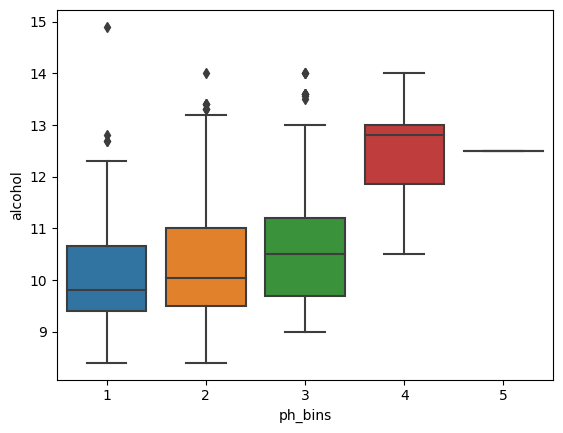

In [ ]:
# а если посмотрим по группам, то в группах 1-3 не увидим значимых различий, однако в группах отчетливо видны различия
sns.boxplot(data=df, x='ph_bins', y='alcohol')

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'quality', 'ph_bins'],
      dtype='object')

<ipython-input-15-73009cddfaf5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


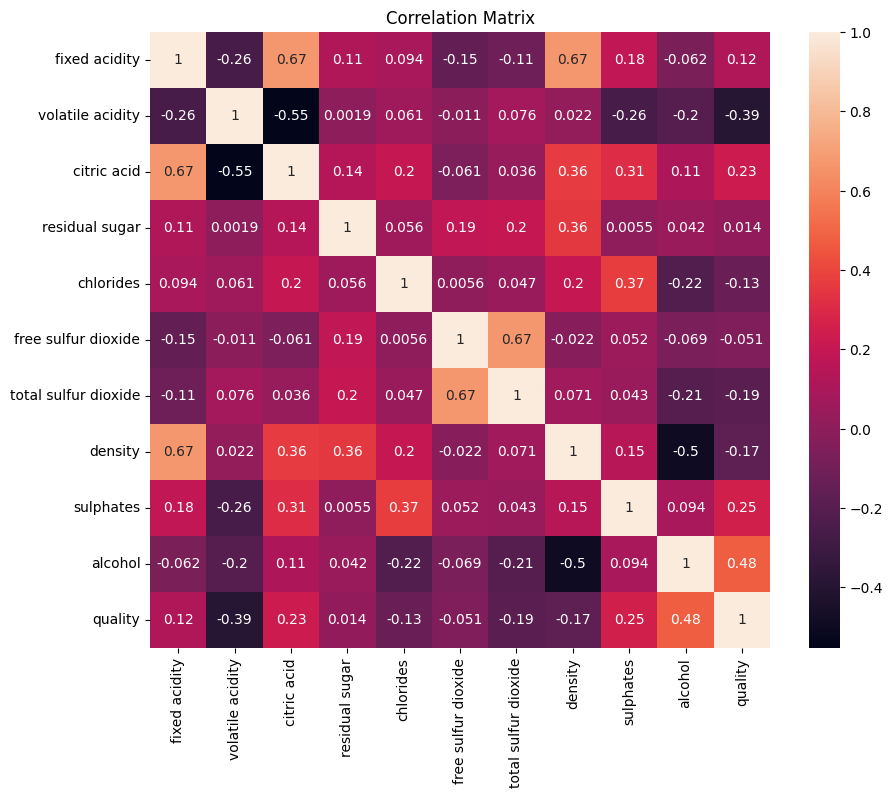

In [ ]:
# Матрица корреляций для проверки мультиколлинеарности и проверка влияния на целевую переменную (Алкоголь)
# Также можем отобрать потенциальные признаки (те, у которых есть корреляция)
# Однако, есть опасность, есть признаки зависят между собой и одновременно зависят от переменной Alcohol, тут необхоимд придумать решение.
# Как вараинт - PCA точек или бининг или другие методы трансформации признаков
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

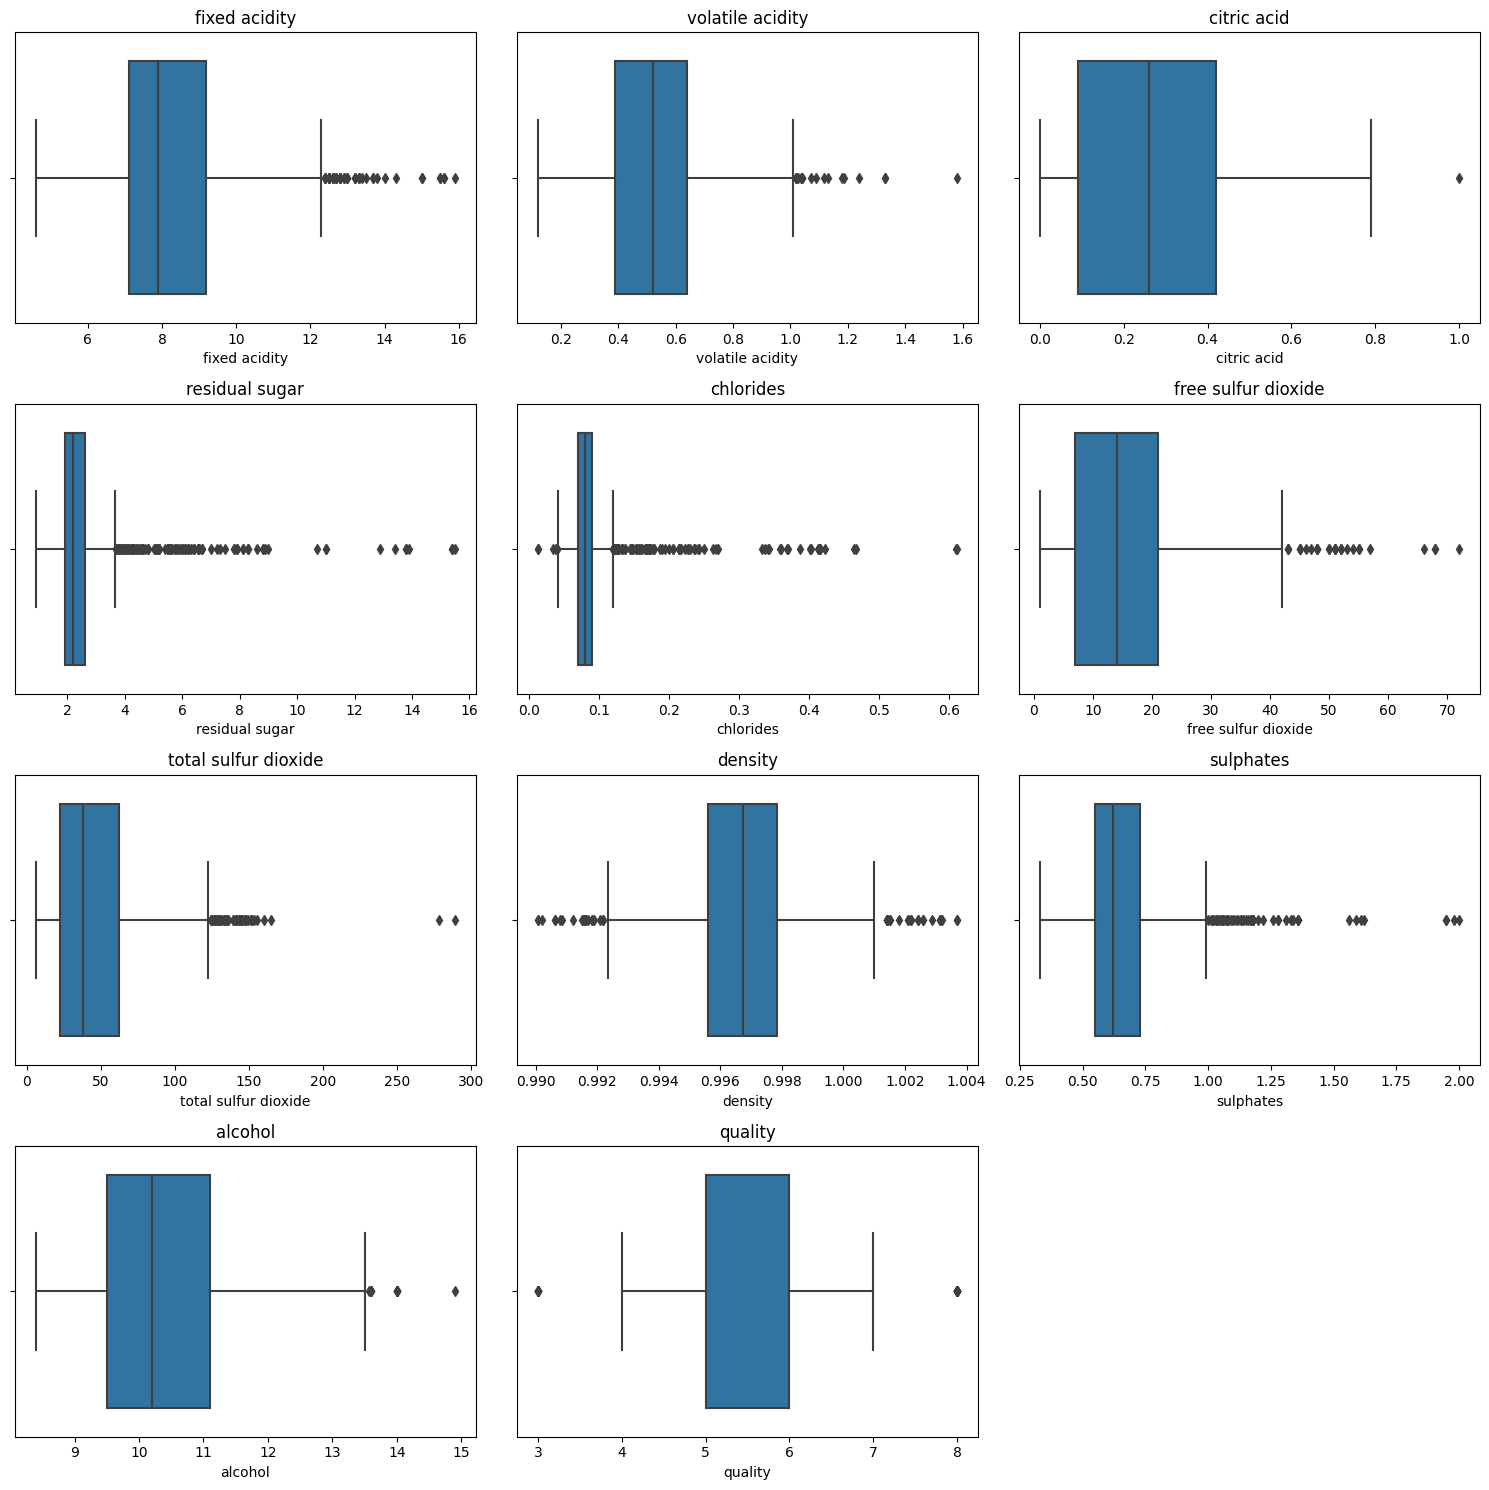

In [ ]:
# Однофакторные boxplot для числовых переменных
# По ним мы можем с одной стороны - выбрать переменные для анализа, с другой стороны, отбросить переменные с кучей выбросов
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x=column)
    plt.title(column)

plt.tight_layout()
plt.show()

## А теперь самое интересное. Проверка влияния переменных на целевую переменную.

Визуально, мы можем использовать давно известные методы (корреляция и диаграмма рассеивания) для числовых переменных

countplot и histplot относительно категориальной переменной - для категориальных

По диаграммам рассеивания мы можем посмотреть зависимость переменных друг от друга (см лаба 2). Те переменные, у которых есть зависимсоть прямая или обраятная (см корреляция) - берем для анализа

In [ ]:
df.corr()['alcohol']

<ipython-input-19-60415a87ff58>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['alcohol']


fixed acidity          -0.061668
volatile acidity       -0.202288
citric acid             0.109903
residual sugar          0.042075
chlorides              -0.221141
free sulfur dioxide    -0.069408
total sulfur dioxide   -0.205654
density                -0.496180
sulphates               0.093595
alcohol                 1.000000
quality                 0.476166
Name: alcohol, dtype: float64

Видим, что самая большая корреляция с density (-0.496180). и quality 0.47
Это означает, что вероятно эти признаки подходят для дальнейшего анализа. Мы посмотрели их распределеиня, перекоса не заметили, значит может брать дальше.

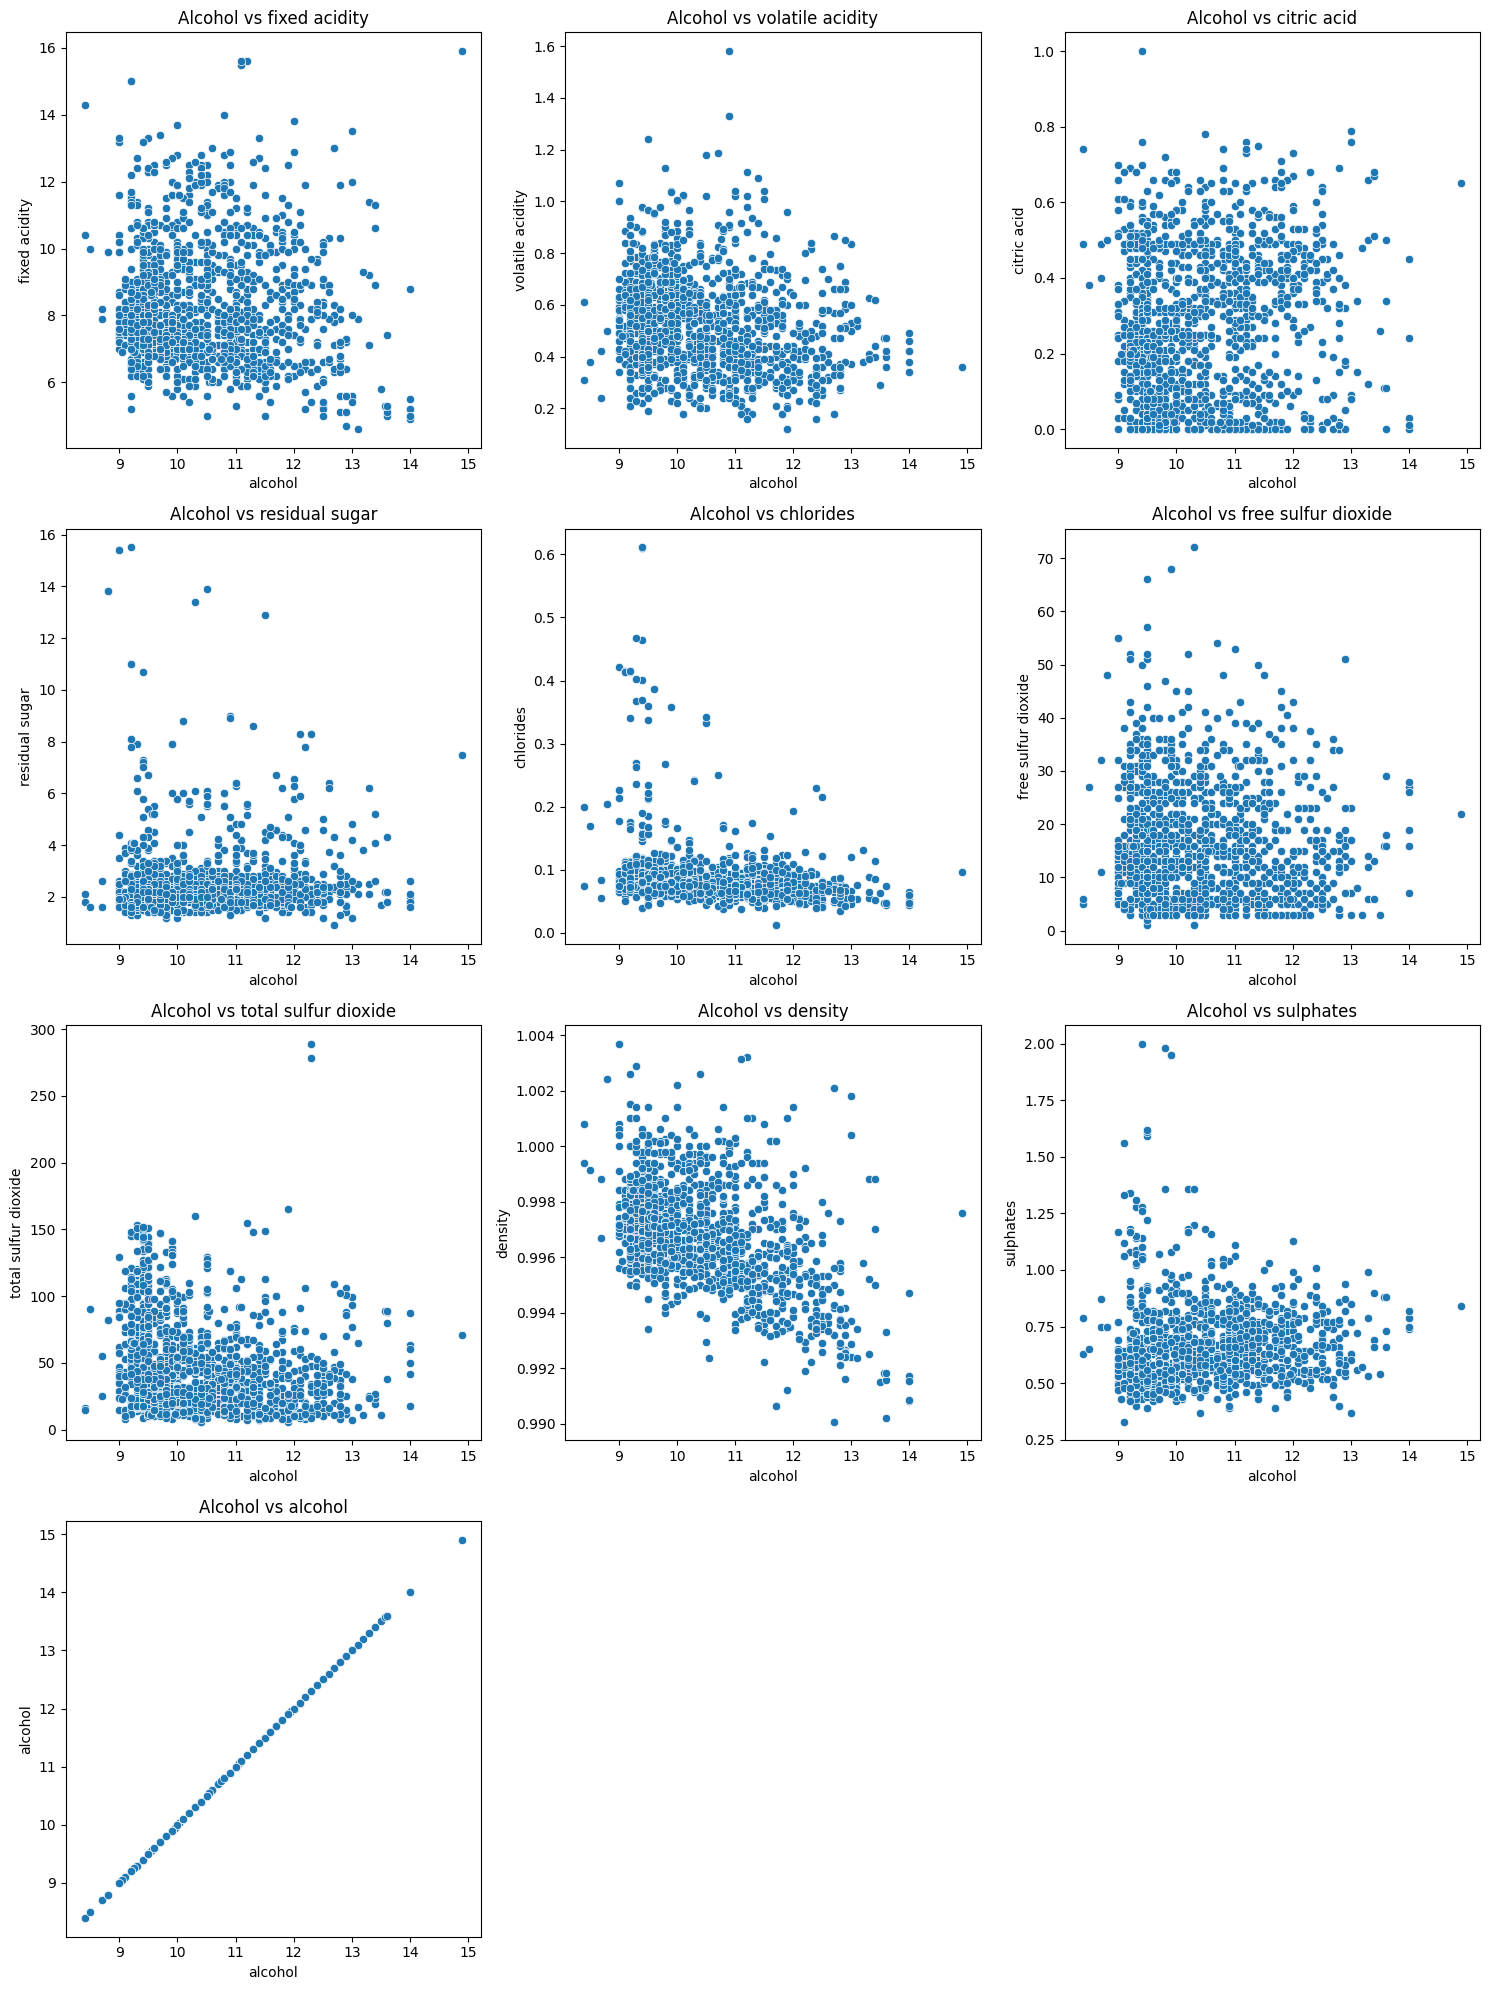

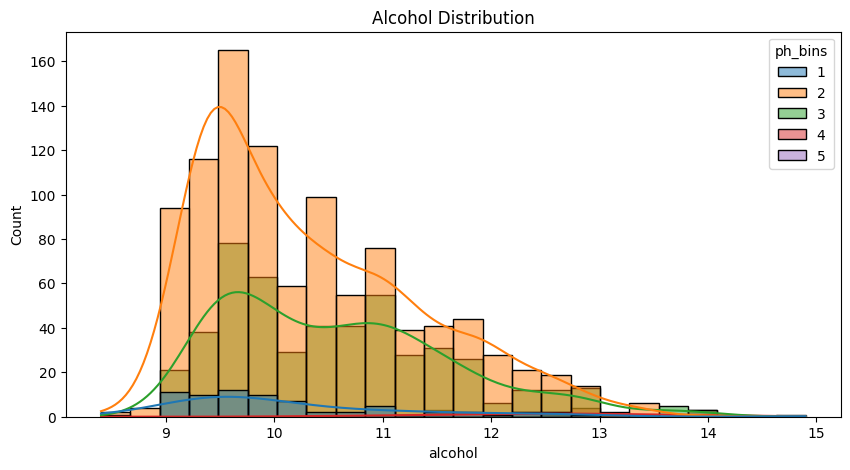

In [ ]:
plt.figure(figsize=(15, 20))

# Создание диаграмм рассеивания для каждой числовой переменной относительно алкоголя
for i, column in enumerate(num_columns[:-1], 1):  # Исключаем 'alcohol' из цикла
    plt.subplot(4, 3, i)
    sns.scatterplot(data=df, x='alcohol', y=column)
    plt.title(f'Alcohol vs {column}')

plt.tight_layout()
plt.show()

# Histplot для переменной алкоголь
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='alcohol', hue='ph_bins', kde=True)
plt.title('Alcohol Distribution')
plt.show()

Для начала отберем признаки, которые коррилируют с alcohol.

<ipython-input-21-9d143ab1dc51>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['alcohol']
<ipython-input-21-9d143ab1dc51>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_features.corr(), annot=True)


<Axes: >

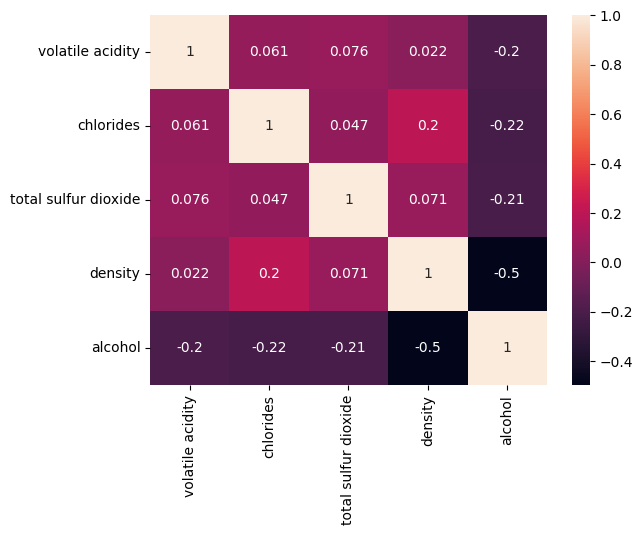

In [ ]:
df.corr()['alcohol']

feature_columns = ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'ph_bins']

df_features = df[feature_columns + ['alcohol']]

sns.heatmap(df_features.corr(), annot=True)

Вот перечень основных метрик качества моделей для задачи регрессии, их формулы, диапазоны и то, что они показывают:

### 1. Средняя Абсолютная Ошибка (MAE - Mean Absolute Error)
Формула:  
```python
MAE = sum(abs(y_true - y_pred)) / n
```
- **Диапазон**: [0, ∞)
- **Описание**: Среднее значение абсолютных разностей между истинными и предсказанными значениями. Показывает среднюю ошибку модели.

### 2. Среднеквадратическая Ошибка (MSE - Mean Squared Error)
Формула:  
```python
MSE = sum((y_true - y_pred)^2) / n
```
- **Диапазон**: [0, ∞)
- **Описание**: Среднее значение квадратов разностей между истинными и предсказанными значениями. Подчеркивает большие ошибки.

### 3. Коэффициент Детерминации (R² Score)
Формула:  
```python
R2 = 1 - sum((y_true - y_pred)^2) / sum((y_true - mean(y_true))^2)
```
- **Диапазон**: (-∞, 1]. Часто [0, 1], но может быть отрицательным.
- **Описание**: Доля объясненной моделью вариации зависимой переменной. Значение 1 означает идеальное предсказание, значение 0 — что модель не лучше постоянной, а отрицательные значения указывают либо на "несходимость" данных, либо на ошибку (например признаки разных масштабов)

### 4. Средняя Абсолютная Процентная Ошибка (MAPE - Mean Absolute Percentage Error)
Формула:  
```python
MAPE = 100 * sum(abs((y_true - y_pred) / y_true)) / n
```
- **Диапазон**: [0, 100]
- **Описание**: Среднее значение абсолютных процентных ошибок. Полезно для сравнения ошибок между разными наборами данных.

### 5. Корень из Среднеквадратической Ошибки (RMSE - Root Mean Squared Error)
Формула:  
```python
RMSE = sqrt(sum((y_true - y_pred)^2) / n)
```
- **Диапазон**: [0, ∞)
- **Описание**: Квадратный корень из MSE. Предоставляет оценку ошибки в тех же единицах, что и исходные данные.

### 6. Медианная Абсолютная Ошибка (MedAE - Median Absolute Error)
Формула:  
```python
MedAE = median(abs(y_true - y_pred))
```
- **Диапазон**: [0, ∞)
- **Описание**: Медиана абсолютных разностей между предсказанными и истинными значениями. Устойчива к выбросам. Нужна редко

### 7. Экспоненциальная Ошибка (MSLE - Mean Squared Logarithmic Error)
Формула:  
```python
MSLE = sum((log(1 + y_true) - log(1 + y_pred))^2) / n
```
- **Диапазон**: [0, ∞)
- **Описание**: Среднее значение квадратов логарифмических разностей. Подходит для данных с экспоненциальным ростом или когда нужно штрафовать за недопредсказание сильнее, чем за перепредсказание.

Эти метрики помогают оценить, насколько хорошо модель регрессии предсказывает истинные значения, и выбрать наиболее подходящую модель для конкретной задачи.

## Датасет для исследования

Мы отобрали признаки, которые как-то виляют на alcohol.
Это:

- volatile acidity
- chlorides
- total sulfur dioxide
- density
- ph_bins

In [ ]:
df[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'ph_bins', 'alcohol']]

,volatile acidity,chlorides,total sulfur dioxide,density,ph_bins,alcohol
0,0.700,0.076,34.0,0.99780,3,9.4
1,0.880,0.098,67.0,0.99680,2,9.8
2,0.760,0.092,54.0,0.99700,2,9.8
3,0.280,0.075,60.0,0.99800,2,9.8
4,0.700,0.076,34.0,0.99780,3,9.4
...,...,...,...,...,...,...
1594,0.600,0.090,44.0,0.99490,3,10.5
1595,0.550,0.062,51.0,0.99512,3,11.2
1596,0.510,0.076,40.0,0.99574,3,11.0
1597,0.645,0.075,44.0,0.99547,3,10.2


Проводим привычную нам трансформацию.

Числовые переменные - MinMax или Standard
Категориальные - OneHot

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def transform_dataframe(df):
    # Проверка на наличие необходимых столбцов
    required_columns = ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'ph_bins']
    if not all(column in df.columns for column in required_columns):
        raise ValueError("DataFrame must contain the required columns.")

    # Создание копии DataFrame, чтобы не изменять исходный df
    df_transformed = df.copy()

    # Преобразование первых четырех признаков с помощью StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_transformed[required_columns[:-1]])

    # Преобразование 'ph_bins' с помощью pd.get_dummies
    ph_bins_dummies = pd.get_dummies(df_transformed['ph_bins'], prefix='ph')

    # Объединение масштабированных признаков и dummy переменных
    df_transformed = pd.DataFrame(scaled_features, columns=required_columns[:-1])
    df_transformed = pd.concat([df_transformed, ph_bins_dummies], axis=1)

    return df_transformed

df_research = transform_dataframe(df[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'ph_bins']])
pd.concat([df_research, df['alcohol'], ], axis=1)

,volatile acidity,chlorides,total sulfur dioxide,density,ph_1,ph_2,ph_3,ph_4,ph_5,alcohol
0,0.961877,-0.243707,-0.379133,0.558274,0,0,1,0,0,9.4
1,1.967442,0.223875,0.624363,0.028261,0,1,0,0,0,9.8
2,1.297065,0.096353,0.229047,0.134264,0,1,0,0,0,9.8
3,-1.384443,-0.264960,0.411500,0.664277,0,1,0,0,0,9.8
4,0.961877,-0.243707,-0.379133,0.558274,0,0,1,0,0,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,0.403229,0.053845,-0.075043,-0.978765,0,0,1,0,0,10.5
1595,0.123905,-0.541259,0.137820,-0.862162,0,0,1,0,0,11.2
1596,-0.099554,-0.243707,-0.196679,-0.533554,0,0,1,0,0,11.0
1597,0.654620,-0.264960,-0.075043,-0.676657,0,0,1,0,0,10.2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Выборка признаков и целевой переменной
X = df_research
y = df['alcohol']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def compute_regression(X, y):
  # Создание и обучение модели линейной регрессии
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }


In [ ]:
model = compute_regression(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)


{'MAE': 0.6821634537934131,
 'MSE': 0.742596108041408,
 'R2': 0.3293624845555553,
 'mape (reverted - % верно угаданых)': 93.50600484482185,
 'mape (original - % ошибок)': 6.493995155178157}

In [ ]:
model = compute_regression(X_train, y_train) # Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)


{'MAE': 0.7191640567174826,
 'MSE': 0.800078305978265,
 'R2': 0.3573297205585544,
 'mape (reverted - % верно угаданых)': 93.13071064649112,
 'mape (original - % ошибок)': 6.869289353508883}

In [ ]:
coefficients = model.coef_
coefficients

array([-0.19697142, -0.11150125, -0.18544562, -0.44093004, -0.41343908,
       -0.58304113, -0.48509144,  0.79656756,  0.68500409])

Коэффициенты модели показывают величину и направление влияния каждой независимой переменной (признака) на прогнозируемую переменную.

В вашем случае, задача состоит в предсказании содержания алкоголя, коэффициенты следует интерпретировать следующим образом:

- **Положительные коэффициенты** (например, pH_4 и pH_5) означают, что с увеличением значения этой переменной прогнозируемое значение содержания алкоголя также увеличивается. То есть, более высокие значения pH_4 и pH_5 ассоциируются с более высоким содержанием алкоголя.

- **Отрицательные коэффициенты** (например, плотность и общий диоксид серы) означают, что с увеличением значения этой переменной прогнозируемое значение содержания алкоголя уменьшается. То есть, более высокие значения плотности и общего диоксида серы ассоциируются с более низким содержанием алкоголя.

- **Большие по модулю значения коэффициентов** (например, pH_5) означают, что признак оказывает сильное влияние на прогнозируемую переменную, в то время как **коэффициенты близкие к нулю** (например, pH_1 и pH_2) означают, что признак оказывает слабое или незначительное влияние.

In [ ]:
model.coef_

array([-0.19697142, -0.11150125, -0.18544562, -0.44093004, -0.41343908,
       -0.58304113, -0.48509144,  0.79656756,  0.68500409])

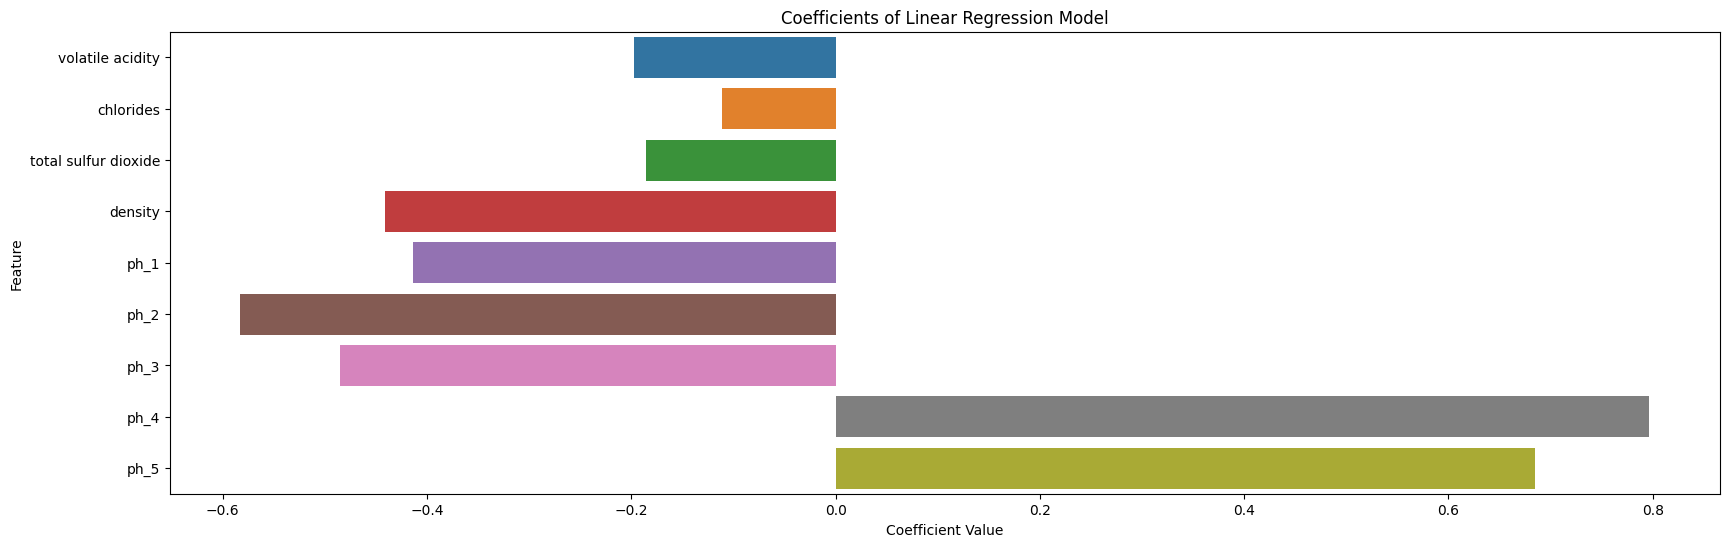

In [ ]:
# Получение коэффициентов линейной регрессии
coefficients = model.coef_

# Названия признаков
feature_names = ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'ph_1', 'ph_2', 'ph_3', 'ph_4', 'ph_5']

# Визуализация коэффициентов
plt.figure(figsize=(20, 6))
sns.barplot(x=coefficients, y=feature_names)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

А теперь попробуем добавить итоговую переменную в набор данных и обучить алгоритм

In [ ]:
bad_model = compute_regression(df, y) # Прогнозирование на всей выборке
y_pred = bad_model.predict(df)

compute_metrics(y, y_pred) # В результате видим, что получается все классно и круто, но по факту неработающая модель :)

{'MAE': 9.809400182554228e-16,
 'MSE': 3.198858104723603e-30,
 'R2': 1.0,
 'mape (reverted - % верно угаданых)': 99.99999999999999,
 'mape (original - % ошибок)': 9.654502274166664e-15}

С помощью магического метода (встроенный метод для всех объектов, ```__dict__``` как один из примеров - мы можешь получить все параметры модели)

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density',
        'ph_1', 'ph_2', 'ph_3', 'ph_4', 'ph_5'], dtype=object),
 'n_features_in_': 9,
 'coef_': array([-0.19697142, -0.11150125, -0.18544562, -0.44093004, -0.41343908,
        -0.58304113, -0.48509144,  0.79656756,  0.68500409]),
 'rank_': 8,
 'singular_': array([4.08876372e+01, 3.65673546e+01, 3.48309941e+01, 3.24252868e+01,
        2.19397102e+01, 8.53214879e+00, 3.85323615e+00, 1.11138711e+00,
        2.36639997e-15]),
 'intercept_': 10.961969426467162}

Обобщенная формула линейной регрессии:

`y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ`

Где:
- `y` - зависимая переменная, которую мы хотим предсказать.
- `β₀` - пересечение с осью Y (intercept), или значение `y`, когда все независимые переменные (`Xᵢ`) равны 0.
- `β₁, β₂, ..., βₙ` - коэффициенты, показывающие вклад каждой независимой переменной (`Xᵢ`) в предсказание зависимой переменной.

Применение формулы к предсказанию уровня алкоголя в вине:

`y = 10.961 -0.196 × volatile acidity - 0.111 × chlorides - 0.185 × total sulfur dioxide - 0.44 × density -0.43 * ph_1 - 0.58 * ph_2 - 0.48 * ph_3 + 0.79 * ph_4 + 0.68 * ph_5`

Здесь:
- `10.4311` это пересечение (intercept).
- Каждый коэффициент (например, `-0.196`, `-0.111` и т.д.) умножается на значение соответствующего предиктора (например, на значение "volatile acidity" для `-0.196`).
- Знак минус перед коэффициентами указывает на обратную корреляцию между предикторами и уровнем алкоголя в вине.


In [ ]:
import numpy as np

# пример реализации простой линейной регресии
def linear_regression(X, y, learning_rate=0.01, max_iter=1000):
    m = len(y)
    X = np.c_[np.ones(m), X]  # добавляем колонку для intercept
    theta = np.zeros(X.shape[1])
    prev_theta = np.zeros(X.shape[1])
    unchanged_count = 0

    for iteration in range(max_iter):
        gradients = -2/m * X.T.dot(y - X.dot(theta))
        prev_theta = theta.copy()
        theta -= learning_rate * gradients

        # Проверка на изменение коэффициентов
        # Упрощенный пример реализации
        # нейросетевого early_stopping https://keras.io/api/callbacks/early_stopping/
        if np.allclose(prev_theta, theta):
            unchanged_count += 1
        else:
            unchanged_count = 0

        if unchanged_count >= 5:
            break
    print('коэфциенты регрессии: ', theta)
    return X.dot(theta) # скалярное произведение вектора наблюдений и коэфциентов


X = np.array(X_train)
y = np.array(y_train)

In [ ]:
y_pred = linear_regression(X, y)
compute_metrics(y, y_pred)

коэфциенты регрессии:  [ 7.87103302 -0.20246984 -0.07915169 -0.14877438 -0.50501319  1.80421134
  2.54496907  2.6677428   0.74865172  0.10545808]


{'MAE': 0.7260330040710978,
 'MSE': 0.8942332872419153,
 'R2': 0.21208564693604437,
 'mape (reverted - % верно угаданых)': 93.11640061059656,
 'mape (original - % ошибок)': 6.883599389403454}

## Результат предсказаний моеди ЛР

y - истинные значения (а именно значения тренировочной выборки)

y_pred - предсказанные значения

In [ ]:
pd.DataFrame({'y': y, 'y_pred': y_pred})

,y,y_pred
0,9.4,10.137784
1,9.8,9.892773
2,9.8,10.043878
3,9.8,10.320593
4,9.4,10.137784
...,...,...
1594,10.5,10.958326
1595,11.2,10.971430
1596,11.0,10.876935
1597,10.2,10.780092


## KNN

## Метрики расстояний

### Евклидово расстояние

```
d(a, b) = sqrt(sum((a_i - b_i)^2 for i in range(n)))
```

- **Особенности**: Измеряет обычное прямолинейное расстояние между двумя точками.
- **Использование**: Хорошо подходит для многих простых задач машинного обучения с евклидовыми пространствами.

### Манхэттенское расстояние

```
d(a, b) = sum(abs(a_i - b_i) for i in range(n))
```

- **Особенности**: Сумма абсолютных разностей. Похоже на расстояние, которое нужно пройти между двумя точками в сетке городских кварталов.
- **Использование**: Полезно в задачах, где разница в каждом измерении имеет одинаковое значение.

### Чебышевское расстояние

```
d(a, b) = max(abs(a_i - b_i) for i in range(n))
```

- **Особенности**: Равно максимальной разнице по любой оси координат.
- **Использование**: Применимо в ситуациях, где важно только максимальное расстояние по одной оси.

### Минковского расстояние

```
d(a, b) = (sum(abs(a_i - b_i)^p for i in range(n)))**(1/p)
```

- **Особенности**: Обобщение евклидова и манхэттенского расстояний. p = 2 соответствует евклидовому, а p = 1 манхэттенскому.
- **Использование**: Настраиваемый параметр p позволяет адаптировать метрику под конкретную задачу.

### Косинусное расстояние

```
d(a, b) = 1 - (a dot b) / (norm(a) * norm(b))
```

- **Особенности**: Измеряет косинус угла между двумя векторами. Не зависит от их величины, только от направления.
- **Использование**: Широко используется в текстовых данных и NLP для определения схожести документов.


In [ ]:
# Евклидово расстояние
def euclidean_distance(a, b):
    return np.sqrt(np.sum((np.array(a) - np.array(b))**2))

# Манхэттенское расстояние
def manhattan_distance(a, b):
    return np.sum(np.abs(np.array(a) - np.array(b)))

# Чебышевское расстояние
def chebyshev_distance(a, b):
    return np.max(np.abs(np.array(a) - np.array(b)))

# Минковского расстояние
def minkowski_distance(a, b, p=3):
    return np.sum(np.abs(np.array(a) - np.array(b))**p)**(1/p)

# Косинусное расстояние
def cosine_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return 1 - np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

Давайте рассмотрим пример из области рекомендательных систем, где часто используются различные метрики расстояния для вычисления схожести между пользователями или объектами. В нашем примере мы будем рекомендовать фильмы пользователям на основе их предпочтений.

### Сценарий 1: Евклидово и Косинусное Расстояние (Рейтинги Фильмов)
Представим, что у нас есть набор данных с рейтингами фильмов от разных пользователей. Рейтинги — числа от 1 до 10. Здесь мы можем использовать евклидово расстояние для нахождения пользователей с похожими вкусами, поскольку оно хорошо работает в ситуациях, где важны абсолютные различия в оценках.

Однако, если мы хотим учитывать не столько абсолютные оценки, сколько общие предпочтения (например, оба пользователя ставят высокие оценки одним и тем же фильмам, независимо от абсолютных значений этих оценок), лучше использовать косинусное расстояние. Оно позволяет судить о схожести вкусов на основе угла между векторами рейтингов, игнорируя их масштаб.

### Сценарий 2: Манхэттенское и Чебышевское Расстояние (Местоположение Пользователей)
Теперь предположим, что мы хотим сгруппировать пользователей на основе их географического местоположения для рекламной кампании. Здесь координаты каждого пользователя представлены в формате широты и долготы.

Манхэттенское расстояние подойдет, если мы предполагаем, что пользователи перемещаются по городу с регулярной дорожной сеткой (например, в Нью-Йорке). Оно учитывает только горизонтальное и вертикальное перемещение.

В ситуациях, где важно максимальное отклонение по одной из осей (например, если мы хотим учитывать только удаленность по широте или долготе), лучше использовать чебышевское расстояние.

### Сценарий 3: Минковского Расстояние (Комбинированные Признаки)
Если нам нужно работать с данными, где важно учитывать и географическое местоположение пользователей, и их предпочтения в фильмах, мы можем использовать расстояние Минковского. Это расстояние позволяет нам настраивать параметр \( p \), чтобы найти баланс между важностью географической близости и схожести вкусов.

В каждом из этих сценариев выбор метрики зависит от специфики данных и поставленной задачи, и разные метрики могут давать совершенно разные результаты в зависимости от контекста.

In [ ]:
from scipy.spatial.distance import cdist

def euclidean_distance(X_train, X_test):
    # Возвращает матрицу расстояний, где каждый элемент [i, j] - расстояние
    # от i-й точки в X_test до j-й точки в X_train
    return cdist(X_test, X_train, 'euclidean')

# Теперь вы можете вызвать эту функцию, передавая два массива точек
distances = euclidean_distance(X_train, X_test)


def find_k_nearest_neighbors(distances, k=5):
    """
    Находит k ближайших соседей для каждой точки в X_test.

    Параметры:
    distances: np.array - матрица расстояний между X_test и X_train
    k: int - количество ближайших соседей

    Возвращает:
    neighbors_indices: np.array - индексы k ближайших соседей для каждой точки в X_test
    """
    # Отсортировать каждую строку и взять первые k индексов
    neighbors_indices = np.argsort(distances, axis=1)[:, :k]
    return neighbors_indices

In [ ]:
distances

array([[2.59112502, 5.26661358, 1.48187865, ..., 2.04294892, 2.88849546,
        3.9233002 ],
       [2.54891927, 3.8578128 , 3.38874601, ..., 1.15184018, 3.56769732,
        3.85815748],
       [2.0653336 , 6.85628032, 2.05692252, ..., 2.70515094, 4.24404963,
        5.48830379],
       ...,
       [3.00168404, 5.27198419, 1.75441975, ..., 2.29983597, 2.83444657,
        3.62490697],
       [4.07451484, 4.83141307, 1.69145857, ..., 3.20879964, 1.20808174,
        2.69681345],
       [2.77760463, 6.61451482, 2.26334178, ..., 2.72028842, 3.67551468,
        4.58476449]])

In [ ]:
find_k_nearest_neighbors(distances, k=3)[:10] # индексы k ближайших соседей бля первых 10 наблюдений из X_test

array([[ 975,  784,  481],
       [ 493,  173,  162],
       [ 977,  667,  238],
       [1181, 1270,  714],
       [1018,  157,  536],
       [1239,   54,  569],
       [1041, 1069,  715],
       [ 759,  899,  655],
       [ 574,  747,  971],
       [1025,  646,  830]])

In [ ]:
from scipy.spatial.distance import euclidean, cosine
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import cityblock, chebyshev

# Функция для нахождения похожих пользователей на основе рейтингов фильмов
def find_similar_users_euclidean(user_ratings, target_user_ratings):
    distances = []
    for user_id, ratings in user_ratings.items():
        dist = euclidean(ratings, target_user_ratings)
        distances.append((user_id, dist))
    distances.sort(key=lambda x: x[1])
    return distances

def find_similar_users_cosine(user_ratings, target_user_ratings):
    distances = []
    for user_id, ratings in user_ratings.items():
        dist = cosine(ratings, target_user_ratings)
        distances.append((user_id, dist))
    distances.sort(key=lambda x: x[1])
    return distances

# Пример использования
# user_ratings = {user_id: [ratings], ...}
# target_user_ratings = [ratings]

def group_users_manhattan(user_locations, reference_location):
    distances = []
    for user_id, location in user_locations.items():
        dist = cityblock(location, reference_location)
        distances.append((user_id, dist))
    distances.sort(key=lambda x: x[1])
    return distances

def group_users_chebyshev(user_locations, reference_location):
    distances = []
    for user_id, location in user_locations.items():
        dist = chebyshev(location, reference_location)
        distances.append((user_id, dist))
    distances.sort(key=lambda x: x[1])
    return distances

# Пример использования
# user_locations = {user_id: (latitude, longitude), ...}
# reference_location = (latitude, longitude)


def combined_feature_distance(combined_data, target_data, p=3):
    distances = []
    for user_id, data in combined_data.items():
        dist = minkowski(data, target_data, p)
        distances.append((user_id, dist))
    distances.sort(key=lambda x: x[1])
    return distances

# Пример использования
# combined_data = {user_id: [combined_features], ...}
# target_data = [combined_features]


In [ ]:
# Фиктивные данные рейтингов фильмов
user_ratings = {
    "user1": [4, 5, 6, 7, 8],
    "user2": [3, 4, 5, 4, 3],
    "user3": [5, 5, 5, 5, 5],
    "user4": [7, 8, 7, 6, 5],
    "user5": [1, 2, 2, 3, 4]
}

# Целевой пользователь
target_user_ratings = [5, 6, 7, 6, 5]

# Найти похожих пользователей
similar_users_euclidean = find_similar_users_euclidean(user_ratings, target_user_ratings)
similar_users_cosine = find_similar_users_cosine(user_ratings, target_user_ratings)

print("Похожие пользователи (Евклидово расстояние):", similar_users_euclidean)
print("Похожие пользователи (Косинусное расстояние):", similar_users_cosine)


Похожие пользователи (Евклидово расстояние): [('user3', 2.449489742783178), ('user4', 2.8284271247461903), ('user1', 3.605551275463989), ('user2', 4.47213595499958), ('user5', 8.18535277187245)]
Похожие пользователи (Косинусное расстояние): [('user2', 0.00218562434433367), ('user3', 0.008220926317684452), ('user4', 0.011658976274818489), ('user1', 0.0346731353170211), ('user5', 0.09507710333067121)]


In [ ]:
# Фиктивные данные местоположений пользователей
user_locations = {
    "user1": (40.7128, -74.0060),  # Нью-Йорк
    "user2": (34.0522, -118.2437), # Лос-Анджелес
    "user3": (41.8781, -87.6298),  # Чикаго
    "user4": (29.7604, -95.3698),  # Хьюстон
    "user5": (39.9526, -75.1652)   # Филадельфия
}

# Целевое местоположение (Например, Сан-Франциско)
reference_location = (37.7749, -122.4194)

group_manhattan = group_users_manhattan(user_locations, reference_location)
group_chebyshev = group_users_chebyshev(user_locations, reference_location)

print("Группы пользователей (Манхэттенское расстояние):", group_manhattan)
print("Группы пользователей (Чебышевское расстояние):", group_chebyshev)


Группы пользователей (Манхэттенское расстояние): [('user2', 7.898399999999995), ('user4', 35.064099999999996), ('user3', 38.892799999999994), ('user5', 49.43189999999999), ('user1', 51.351299999999995)]
Группы пользователей (Чебышевское расстояние): [('user2', 4.175699999999992), ('user4', 27.049599999999998), ('user3', 34.78959999999999), ('user5', 47.2542), ('user1', 48.413399999999996)]


In [ ]:
# Фиктивные комбинированные данные (географическое положение и рейтинги фильмов)
combined_data = {
    "user1": [40.7128, -74.0060, 4, 5, 6],
    "user2": [34.0522, -118.2437, 3, 4, 5],
    "user3": [41.8781, -87.6298, 5, 5, 5],
    "user4": [29.7604, -95.3698, 7, 8, 7],
    "user5": [39.9526, -75.1652, 1, 2, 2]
}

# Целевые комбинированные данные
target_data = [37.7749, -122.4194, 5, 6, 7]

combined_distances = combined_feature_distance(combined_data, target_data, p=2)

print("Комбинированные расстояния:", combined_distances)


Комбинированные расстояния: [('user2', 6.5798910158147725), ('user4', 28.35336083094912), ('user3', 35.10203011792907), ('user5', 47.903045779261255), ('user1', 48.533375691064386)]


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import SCORERS
from pprint import pprint
# Список метрик для оценки
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']

# Словарь для хранения результатов
results = {}

# Обучение и оценка моделей KNN с разными метриками расстояния
for metric in metrics:
    knn = KNeighborsRegressor(metric=metric, n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Сохранение результатов
    results[metric] = {
        'MAE': round(mean_absolute_error(y_test, y_pred), 2),
        'MSE': round(mean_squared_error(y_test, y_pred), 2),
        'R2': round(r2_score(y_test, y_pred), 2)
    }

pprint(results) # в целом модель сработала вполне себе хорошо

{'chebyshev': {'MAE': 0.6, 'MSE': 0.64, 'R2': 0.48},
 'cosine': {'MAE': 0.59, 'MSE': 0.63, 'R2': 0.49},
 'euclidean': {'MAE': 0.6, 'MSE': 0.63, 'R2': 0.5},
 'manhattan': {'MAE': 0.59, 'MSE': 0.62, 'R2': 0.5},
 'minkowski': {'MAE': 0.6, 'MSE': 0.63, 'R2': 0.5}}


In [ ]:
import numpy as np
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances

def knn_regressor(X_train, y_train, X_test, k=5):
    """
    Простая реализация KNN регрессии.

    Параметры:
    X_train: np.array - обучающий набор признаков
    y_train: np.array - обучающий набор целевой переменной
    X_test: np.array - тестовый набор признаков
    k: int - количество соседей

    Возвращает:
    y_pred: np.array - предсказанные значения для тестового набора
    """

    # Рассчитываем метрику расстояния (для примера - Евклидово расстояние)
    #от каждой тестовой точки до всех точек обучающего набора
    distances = euclidean_distances(X_test, X_train)

    # Инициализация массива для предсказаний
    y_pred = np.zeros(len(X_test))

    # Цикл по всем тестовым точкам
    for i in range(0, len(X_test)):
      test_point = X_test.iloc[i].to_numpy()
      neighbors = np.argsort(distances[i])[:k]
      y_pred[i] = np.mean(y_train[neighbors])

    return y_pred

# Пример использования функции:
# X_train, y_train, X_test уже должны быть определены


y_pred = knn_regressor(X_train, y_train.to_numpy(), X_test, k=3)
compute_metrics(y_test, y_pred)

{'MAE': 0.5982986111111112,
 'MSE': 0.6534762731481483,
 'R2': 0.4750891557308595,
 'mape (reverted - % верно угаданых)': 94.25387904069429,
 'mape (original - % ошибок)': 5.74612095930571}

In [ ]:
pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})

,y_pred,y_test
803,9.966667,9.6
124,9.666667,9.5
350,10.500000,9.9
682,10.400000,9.8
1326,10.600000,10.6
...,...,...
1259,11.300000,11.3
1295,9.300000,9.5
1155,10.100000,9.8
963,11.266667,11.2
